In [75]:
from numpy import * 
import matplotlib.pyplot as plt
from numpy import delete

# Setting up arrays for the data
DATE = array([])
AVG_TEMP = array([])
MAX_TEMP = array([])
MIN_TEMP = array([])

# Importing data
with open('Yearly_USW00024156.csv') as file:
    line1 = file.readline()
    rest_of_lines = file.readlines()
    for line in rest_of_lines:
        numbers = line.split('","')
        DATE = append(DATE, int(numbers[1]))
        AVG_TEMP = append(AVG_TEMP, numbers[78])
        MAX_TEMP = append(MAX_TEMP, numbers[80])
        MIN_TEMP = append(MIN_TEMP, numbers[82])

# Adjusting arrays based on file format
DATE = delete(DATE, 86)
AVG_TEMP = delete(AVG_TEMP, 86)
AVG_TEMP = array(AVG_TEMP, dtype=float)
MAX_TEMP = delete(MAX_TEMP, 86)
MAX_TEMP = array(MAX_TEMP, dtype=float)
MIN_TEMP = delete(MIN_TEMP, 86)
MIN_TEMP = array(MIN_TEMP, dtype=float)

# Make sure data is sorted in chronological order
SORTED_DATE = array([])
SORTED_AVG_TEMP = array([])
SORTED_MAX_TEMP = array([])
SORTED_MIN_TEMP = array([])
index = argsort(DATE)
for i in index:
    SORTED_DATE = append(SORTED_DATE, DATE[i])
    SORTED_AVG_TEMP = append(SORTED_AVG_TEMP, AVG_TEMP[i])
    SORTED_MAX_TEMP = append(SORTED_MAX_TEMP, MAX_TEMP[i])
    SORTED_MIN_TEMP = append(SORTED_MIN_TEMP, MIN_TEMP[i])
DATE = SORTED_DATE
AVG_TEMP = SORTED_AVG_TEMP
MAX_TEMP = SORTED_MAX_TEMP
MIN_TEMP = SORTED_MIN_TEMP

Text(0.5, 0, 'Year')

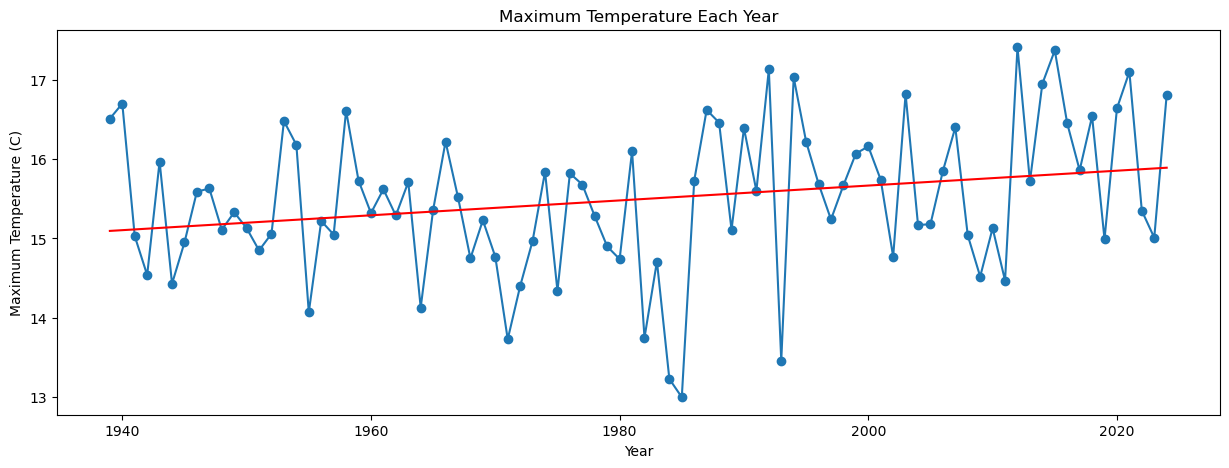

In [77]:
# Linear fit line for the maximum temperatures to see if there is an overall trend
a,b = polyfit(DATE, MAX_TEMP, 1)

# Plotting maximum temperatures and fit line
plt.figure(figsize=(15,5))
plt.plot(DATE, MAX_TEMP, marker='o', linestyle='-')
plt.plot(DATE, a*DATE + b, 'r-')
plt.title('Maximum Temperature Each Year')
plt.ylabel('Maximum Temperature (C)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

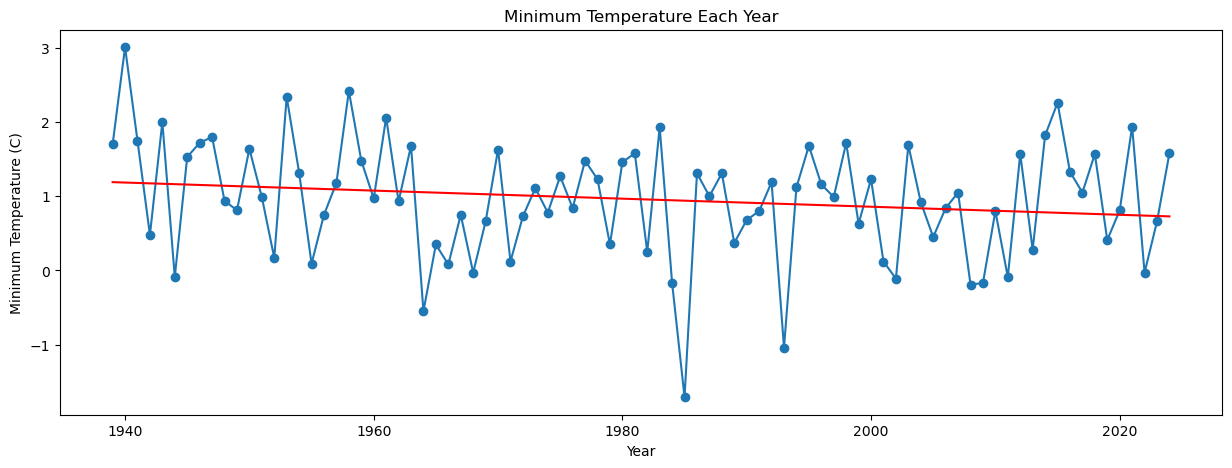

In [79]:
# Linear fit line for the maximum temperatures to see if there is an overall trend
c,d = polyfit(DATE, MIN_TEMP, 1)

# Plotting minimum temperatures and fit line
plt.figure(figsize=(15,5))
plt.plot(DATE, MIN_TEMP, marker='o', linestyle='-')
plt.plot(DATE, c*DATE + d, 'r-')
plt.title('Minimum Temperature Each Year')
plt.ylabel('Minimum Temperature (C)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

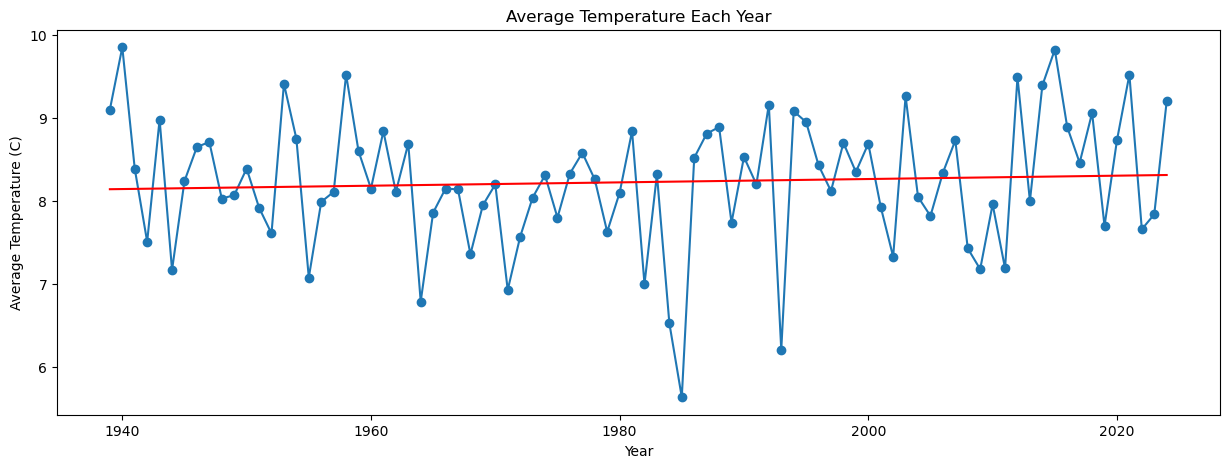

In [81]:
# Linear fit line for the average temperatures to see if there is an overall trend
e,f = polyfit(DATE, AVG_TEMP, 1)

# Plot average temperatures and fit line
plt.figure(figsize=(15,5))
plt.plot(DATE, AVG_TEMP, marker='o', linestyle='-')
plt.plot(DATE, e*DATE + f, 'r-')
plt.title('Average Temperature Each Year')
plt.ylabel('Average Temperature (C)')
plt.xlabel('Year')

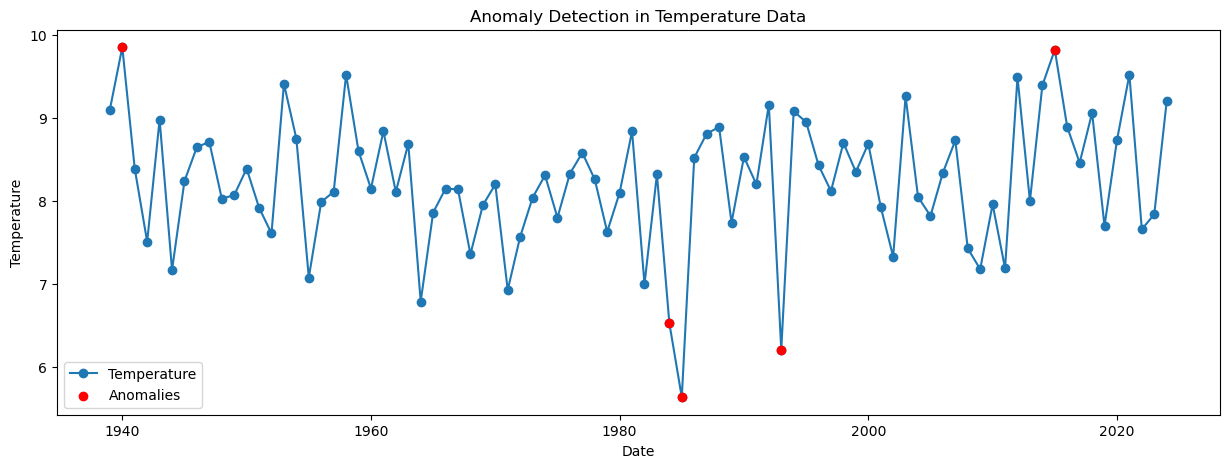

In [83]:
# Compute Z-scores. Z = (data point - average)/standard deviation
mean_temp = mean(AVG_TEMP)
std_temp = std(AVG_TEMP)
z_scores = (AVG_TEMP - mean_temp) / std_temp

# Find anomalies (|Z| > 2)
anomaly_indices = where(abs(z_scores) > 2)[0]
anomalous_dates = array(DATE)[anomaly_indices]
anomalous_temps = AVG_TEMP[anomaly_indices]

# Plot results
plt.figure(figsize=(15,5))
plt.plot(DATE, AVG_TEMP, marker='o', linestyle='-', label="Temperature")
plt.scatter(anomalous_dates, anomalous_temps, color='red', label="Anomalies", zorder=3)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.title("Anomaly Detection in Temperature Data")
plt.show()